In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load dataset
tw_credit = pd.read_csv('/Users/ruby/Desktop/tw_credit_card.csv')

In [3]:
tw_credit.head(3)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0


In [4]:
target = 'default.payment.next.month'
predictors = ['AGE', 'SEX', 'LIMIT_BAL']
cols = ['AGE', 'SEX', 'LIMIT_BAL','default.payment.next.month']

In [5]:
tw_credit = tw_credit[cols]

In [6]:
tw_credit.describe(include='all')

,AGE,SEX,LIMIT_BAL,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,35.485500,1.603733,167484.322667,0.221200
std,9.217904,0.489129,129747.661567,0.415062
min,21.000000,1.000000,10000.000000,0.000000
25%,28.000000,1.000000,50000.000000,0.000000
50%,34.000000,2.000000,140000.000000,0.000000
75%,41.000000,2.000000,240000.000000,0.000000
max,79.000000,2.000000,1000000.000000,1.000000


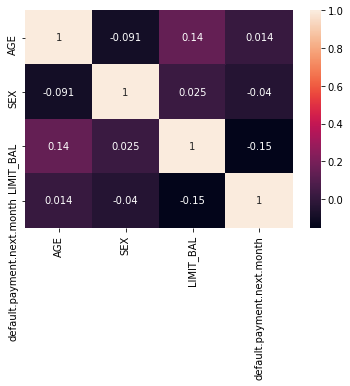

In [7]:
sns.heatmap(tw_credit.corr(), annot=True)

In [8]:
# creating input features and target variables
X= tw_credit[predictors]
y= tw_credit[target]

In [9]:
X['LIMIT_BAL'] = np.log(X['LIMIT_BAL'])

/Users/ruby/Documents/Virtual_Env/dev/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
X.head(3)

,AGE,SEX,LIMIT_BAL
0,24,2,9.903488
1,26,2,11.695247
2,34,2,11.407565


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
# Build NN Model
from keras import Sequential
from keras.layers import Dense, Input, Activation, Flatten
from keras.models import Model, load_model
from keras.optimizers import Adam

Using TensorFlow backend.


In [13]:
classifier = Sequential()

#First Hidden Layer
classifier.add(Dense(3, activation='relu',
                     input_dim=3, name = 'hidden_layer1'))

#Second  Hidden Layer
classifier.add(Dense(20, activation='relu', name = 'hidden_layer2'))

#Third  Hidden Layer
classifier.add(Dense(15, activation='relu', name = 'hidden_layer3'))

#Fourth  Hidden Layer
classifier.add(Dense(8, activation='relu', name = 'hidden_layer4'))

#Output Layer
classifier.add(Dense(1, activation='sigmoid', name = 'tw_output_layer'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
#Compiling the neural network
classifier.compile(optimizer = 'Adam',
                   loss='binary_crossentropy', 
                   metrics =['accuracy'])

In [15]:
#Fitting the data to the training dataset
classifier.fit(X_train, y_train, batch_size=30, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
24000/24000 [==============================] - 1s 47us/step - loss: 0.5412 - acc: 0.7715: 1s - loss: 0.5708 -
Epoch 2/100
24000/24000 [==============================] - 1s 31us/step - loss: 0.5308 - acc: 0.7776
Epoch 3/100
24000/24000 [==============================] - 1s 32us/step - loss: 0.5271 - acc: 0.7776
Epoch 4/100
24000/24000 [==============================] - 1s 32us/step - loss: 0.5254 - acc: 0.7776
Epoch 5/100
24000/24000 [==============================] - 1s 32us/step - loss: 0.5247 - acc: 0.7776
Epoch 6/100
24000/24000 [==============================] - 1s 35us/step - loss: 0.5250 - acc: 0.7776
Epoch 7/100
24000/24000 [==============================] - 1s 32us/step - loss: 0.5244 - acc: 0.7776
Epoch 8/100
24000/24000 [==============================] - 1s 33us/step - loss: 0.5240 - acc: 0.7776
Epoch 9/100
24000/24000 [==============================] - 1s 32us/step - loss: 0.5233 - acc: 0.7776
Epoch 10/100
24000/240

24000/24000 [==============================] - 1s 31us/step - loss: 0.5153 - acc: 0.7776
Epoch 79/100
24000/24000 [==============================] - 1s 31us/step - loss: 0.5151 - acc: 0.7776
Epoch 80/100
24000/24000 [==============================] - 1s 31us/step - loss: 0.5152 - acc: 0.7776
Epoch 81/100
24000/24000 [==============================] - 1s 31us/step - loss: 0.5152 - acc: 0.7776
Epoch 82/100
24000/24000 [==============================] - 1s 31us/step - loss: 0.5151 - acc: 0.7776
Epoch 83/100
24000/24000 [==============================] - 1s 31us/step - loss: 0.5154 - acc: 0.7775
Epoch 84/100
24000/24000 [==============================] - 1s 31us/step - loss: 0.5152 - acc: 0.7776
Epoch 85/100
24000/24000 [==============================] - 1s 31us/step - loss: 0.5158 - acc: 0.7777
Epoch 86/100
24000/24000 [==============================] - 1s 31us/step - loss: 0.5150 - acc: 0.7776
Epoch 87/100
24000/24000 [==============================] - 1s 31us/step - loss: 0.5152 - acc: 

In [16]:
## Another Way
# from keras.optimizers import SGD
# opt = SGD(lr=0.01)
# model.compile(loss = "categorical_crossentropy", optimizer = opt)

In [17]:
eval_model=classifier.evaluate(X_train, y_train)
eval_model

24000/24000 [==============================] - 0s 11us/step


[0.5153253032366435, 0.777625]

In [18]:
# Save Model
classifier.save('neural_network_0602.h5')
classifier.save_weights('neural_network_0602_weights.h5')

In [19]:
tw_model_pre_train = load_model('neural_network_0602.h5')

In [20]:
tw_model_pre_train.summary()
tw_model_pre_train.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 3)                 12        
_________________________________________________________________
hidden_layer2 (Dense)        (None, 20)                80        
_________________________________________________________________
hidden_layer3 (Dense)        (None, 15)                315       
_________________________________________________________________
hidden_layer4 (Dense)        (None, 8)                 128       
_________________________________________________________________
tw_output_layer (Dense)      (None, 1)                 9         
Total params: 544
Trainable params: 544
Non-trainable params: 0
_________________________________________________________________


[array([[ 0.43687257,  0.5460751 ,  0.7315992 ],
        [ 0.88109255, -0.02151354, -0.52715313],
        [ 0.07291427,  1.682757  , -0.1738082 ]], dtype=float32),
 array([ 0.86661476, -1.3172103 ,  1.0770884 ], dtype=float32),
 array([[-0.38038912, -0.17480376,  0.4517123 , -0.37197337,  0.20609543,
         -0.44433287, -0.44622323, -0.18620089, -0.45449093,  0.1151405 ,
         -0.00120604, -0.36829033, -0.31854293,  0.5314405 , -0.26923758,
          0.1290986 ,  0.08267498, -0.5014108 ,  0.29396638,  0.00868476],
        [ 0.29864782, -0.44013667, -0.14006472, -0.06383595,  0.5354582 ,
          0.00764101, -0.02984186, -0.32977372, -0.13274962, -0.08771458,
         -0.34508792, -0.17344442, -0.08063957, -0.50894046,  0.04707258,
         -0.2388801 , -0.16160682, -0.01680306,  0.04057833,  0.03868085],
        [-0.42899606,  0.38837218, -0.4083954 , -0.01922837, -0.4232588 ,
          0.27624893,  0.2937241 ,  0.0804953 , -0.35039198, -0.45622253,
         -0.21149793, -0.05870

### Phase 2 - German Dataset

In [21]:
german_credit = pd.read_pickle('german_sample.pk')
german_credit.shape

(250, 10)

In [22]:
# create mapping dictionary
dict_gender = {'male': 1, 'female': 2}
dict_risk = {'good': 0, 'bad': 1}
dict_purpose = {'radio/TV':0, 'education':1, 'furniture/equipment':2, 'car':3, 
                'business':4,'domestic appliances':5, 'repairs':6, 'vacation/others':7}
dict_housing = {'own':1, 'free':2, 'rent':3}
dict_saving_acct = {'little':1, 'quite rich':2, 'rich':3, 'moderate':4}
dict_checking_acct = {'little':1, 'moderate':2,'rich':3}


german_credit.replace({"Sex": dict_gender}, inplace = True)
german_credit.replace({"Risk": dict_risk}, inplace = True)
german_credit.replace({"Purpose": dict_purpose}, inplace = True)
german_credit.replace({"Housing": dict_housing}, inplace = True)
german_credit.replace({"Saving accounts": dict_saving_acct}, inplace = True)
german_credit.replace({"Checking account": dict_checking_acct}, inplace = True)



# rename columns
german_credit_new = german_credit.rename(columns = {'Sex':'SEX',
                                                    'Age':'AGE',
                                                    'Credit amount':'LIMIT_BAL',
                                                    'Risk':'default.payment.next.month'})


In [23]:
target = 'default.payment.next.month'
# predictors = ['AGE', 'SEX', 'Job', 'Housing', 'Saving accounts', 'Checking account',
#        'LIMIT_BAL', 'Duration', 'Purpose']

predictors = ['AGE', 'SEX', 'LIMIT_BAL']

german_x = german_credit_new[predictors]
german_y = german_credit_new[target]

In [24]:
# Train Test split
x_train_german, x_test_german, y_train_german, y_test_german = train_test_split(
    german_x, german_y, test_size=0.2)

x_train_german.shape, y_train_german.shape, x_test_german.shape, y_test_german.shape

((200, 3), (200,), (50, 3), (50,))

In [25]:
# Load Pre-train Model
base_model = load_model('neural_network_0602.h5')
tw_model_output = base_model.output


# Initialize model for Fine Tune Model
german_model = Sequential()
german_model.load_weights('neural_network_0602_weights.h5', by_name = True)


for layer in base_model.layers[:-2]: # remove the last 2 layers in pre-train model
    german_model.add(layer)    

# Freeze the layers [pre-train model]
for layer in german_model.layers:
    layer.trainable = True


#german_model.add(Flatten(name='hidden_layer3'))(tw_model_output)

    
# German Fine Tune Model
#First Hidden Layer
german_model.add(Dense(30, activation='relu',
                     input_dim=9))

#Second  Hidden Layer
german_model.add(Dense(15, activation='relu'))

#Third  Hidden Layer
german_model.add(Dense(8, activation='relu'))

#Fourth  Hidden Layer
german_model.add(Dense(4, activation='relu'))

#Output Layer
german_model.add(Dense(1, activation='sigmoid'))

In [26]:
#Compiling the neural network
german_model.compile(optimizer = 'Adam',
                   loss='binary_crossentropy', 
                   metrics =['accuracy'])

In [27]:
german_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer1 (Dense)        (None, 3)                 12        
_________________________________________________________________
hidden_layer2 (Dense)        (None, 20)                80        
_________________________________________________________________
hidden_layer3 (Dense)        (None, 15)                315       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 128       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
__________

In [28]:
#Fitting the data to the training dataset
#german_model.fit(x_train_german, y_train_german, batch_size=30, epochs=100)

# Another way
model_output = german_model.fit(x_train_german, y_train_german,
                         epochs=100,batch_size=15,
                         verbose=1,validation_data=(x_test_german, y_test_german),)

Train on 200 samples, validate on 50 samples
Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.7127 - acc: 0.4000 - val_loss: 0.6874 - val_acc: 0.6200
Epoch 2/100
200/200 [==============================] - 0s 110us/step - loss: 0.6803 - acc: 0.6550 - val_loss: 0.6737 - val_acc: 0.6400
Epoch 3/100
200/200 [==============================] - 0s 112us/step - loss: 0.6660 - acc: 0.6550 - val_loss: 0.6656 - val_acc: 0.6400
Epoch 4/100
200/200 [==============================] - 0s 113us/step - loss: 0.6561 - acc: 0.6550 - val_loss: 0.6582 - val_acc: 0.6400
Epoch 5/100
200/200 [==============================] - 0s 124us/step - loss: 0.6474 - acc: 0.6550 - val_loss: 0.6543 - val_acc: 0.6400
Epoch 6/100
200/200 [==============================] - 0s 120us/step - loss: 0.6447 - acc: 0.6550 - val_loss: 0.6545 - val_acc: 0.6400
Epoch 7/100
200/200 [==============================] - 0s 128us/step - loss: 0.6446 - acc: 0.6550 - val_loss: 0.6533 - val_acc: 0.6400
Epoch 8/100


200/200 [==============================] - 0s 104us/step - loss: 0.6370 - acc: 0.6550 - val_loss: 0.6391 - val_acc: 0.6400
Epoch 62/100
200/200 [==============================] - 0s 100us/step - loss: 0.6424 - acc: 0.6550 - val_loss: 0.6367 - val_acc: 0.6400
Epoch 63/100
200/200 [==============================] - 0s 107us/step - loss: 0.6429 - acc: 0.6550 - val_loss: 0.6427 - val_acc: 0.6400
Epoch 64/100
200/200 [==============================] - 0s 104us/step - loss: 0.6374 - acc: 0.6550 - val_loss: 0.6412 - val_acc: 0.6400
Epoch 65/100
200/200 [==============================] - 0s 110us/step - loss: 0.6394 - acc: 0.6550 - val_loss: 0.6429 - val_acc: 0.6400
Epoch 66/100
200/200 [==============================] - 0s 105us/step - loss: 0.6376 - acc: 0.6550 - val_loss: 0.6416 - val_acc: 0.6400
Epoch 67/100
200/200 [==============================] - 0s 101us/step - loss: 0.6385 - acc: 0.6550 - val_loss: 0.6429 - val_acc: 0.6400
Epoch 68/100
200/200 [==============================] - 0s 10

In [29]:
eval_model=german_model.evaluate(x_train_german, y_train_german)
eval_model

200/200 [==============================] - 0s 33us/step


[0.634302921295166, 0.66]

In [30]:
### predict 
german_nn_val_result = german_model.evaluate(x_test_german, y_test_german)
german_nn_val_result

50/50 [==============================] - 0s 58us/step


[0.6356507015228271, 0.6399999976158142]